# EMPOWER MODEL EQUATIONS

In [67]:
import sympy
from IPython.display import display, Markdown, Math

In [ ]:
def listtoeq(List):
    return display(Math(' '.join(map(sympy.latex,List))))

<img src="Screen Shot 2019-12-05 at 11.52.48 2.png">
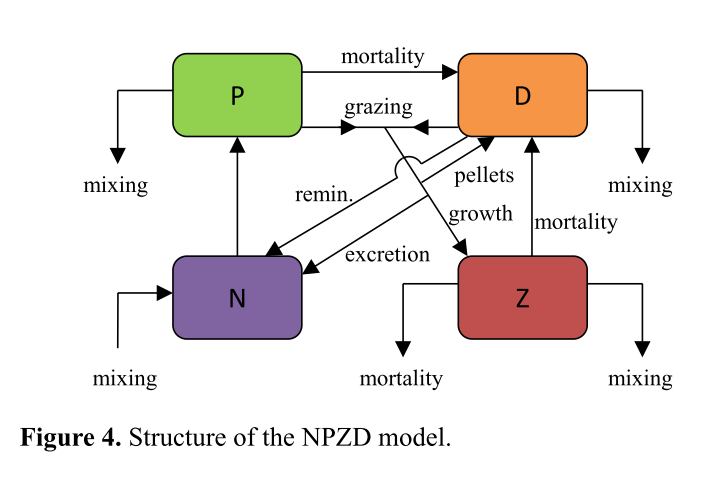

The NPZD ecosystem model we have implemented in EMPOWER is presented in Fig. 4 with 
- dissolved inorganic nitrogen (N; the sum of nitrate and ammonium), 
- phytoplankton (P), 
- zooplankton (Z) and 
- detritus (D) 
as state variables. 

It is a simplification of the marine ecosystem inspired by that of FDM90 
with improved formulations for 
- multiple-prey grazing, 
- plankton mortality, 
- nutrient regeneration and 
- other detrital loss terms, 
as well as alterations to the parameterisation.

## Phytoplankton

In [102]:
# Total Phytoplankton Equation
mu_P, P, grazing_P, mort_lin_P, mort_quad_P, t  = sympy.symbols("mu_P P G_P m_P m_p^2 t")

omega_mix, Ht, Htdot  = sympy.symbols("omega_mix H(t) H'(t)")

dPdt = sympy.Derivative(P,t)
Htdiff = sympy.diff(Ht)
PGains = mu_P * P
PMixing = (omega_mix + Htdot)*P / Ht
PLosses = grazing_P + mort_lin_P * P + mort_quad_P * P ** 2 + PMixing

phyto = sympy.Eq(dPdt, PGains - PLosses)

PHYTO = [dPdt,'=',mu_P,P,-grazing_P,-mort_lin_P,P,-mort_quad_P,P ** 2,-PMixing]

listtoeq(PHYTO)

<IPython.core.display.Math object>

where the terms are growth, grazing and non-grazing mortality (linear and quadratic), physical losses due to mixing across the bottom of the mixed layer, and dilution effects of entrainment. 

$H(t)$ is mixed layer depth $(m)$ at time $t$ and $H'(t)$ denotes the rate of change of $H$ when $dH/dt$ is positive (dilution). As explained above, when $dH/dt$ is negative the change in phytoplankton density due to detrainment of mass from the mixed layer is exactly balanced by the increasing phytoplankton density due to decreases in volume and therefore detrainment does not alter the concentration of remaining biomass. 

Variable $mu_P$ is the vertically averaged temperature-dependent daily growth rate, defined as the product of a temperature-dependent maximum growth rate, $mu^{max}_P(T)$, and non-dimensional limitation terms for nutrients and light, $L_N(N)$ and $L_I(I(t,z))$:

In [113]:
# phytoplankton growth rate
mu_max_P, T, L_N, L_I, z  = sympy.symbols("mu^max_P T L_N L_I z")

PHYTO_growth = [mu_P,'=',mu_max_P,'(T) *',L_N,'(N) *',L_I,'I(t,z)']

listtoeq(PHYTO_growth)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3]:
# MLD-dynamics
# Material exchange between the two layers = K
# MLD depth as function of time = M(t)
# h+(t) is a function describing entrainment and detrainment
# h(t) is derivtive of MLD depth
# k is constant mixing parameter
K, k, M, Mt, hplus, h, t = sympy.symbols('K,kappa,M,M(t),h^{+}(t),h(t),t')
Kmix = (k+hplus)/Mt
hplust = sympy.Max(h,0)
ht = sympy.Derivative(Mt,t)
K_EQ = (k+sympy.Max(ht,0))/Mt
# For Zooplankton, K is given as K_Z = h(t) - actively maintain wihtin upper ML
K_Z = ht/Mt

In [8]:
display('H',K_Z+hplust)

'H'

Max(0, h(t)) + Derivative(M(t), t)/M(t)